In [1]:
from pysis.isis import ciss2isis, cisscal, spiceinit, ringscam2map, getkey, editlab
from pysis.util import file_variations
from pyciss import plotting

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['image.cmap'] = 'YlGnBu_r'

In [11]:
cd ~/data/ciss/pdsdata_sRM_2015-03-12T18-29-13.808978-2/

/Users/klay6683/data/ciss/pdsdata_sRM_2015-03-12T18-29-13.808978-2


In [12]:
ls

N1485648669_1.IMG          N1485648669_1_CALIB.LBL    img.cub
N1485648669_1.LBL          N1485648669_1_full.jpg     img.map.cal.cub
N1485648669_1.cal.cub      PREFIX2.FMT                manifest.txt
N1485648669_1.cub          TLMTAB.FMT                 print.prt
N1485648669_1.map.cal.cub  checksum.txt
N1485648669_1_CALIB.IMG    img.cal.cub


In [10]:
fnames = !ls *.cub
fnames

['N1485648669_1.cal.cub',
 'N1485648669_1.cub',
 'N1485648669_1.map.cal.cub',
 'img.cal.cub',
 'img.cub',
 'img.map.cal.cub']

In [6]:
import os
from os.path import join as pjoin
ISISDATA = os.environ['ISIS3DATA']

def calibrate_ciss(img_name, name_only=False):
    (cub_name, cal_name, map_name) = file_variations(img_name, ['.cub', '.cal.cub',
                                                                '.map.cal.cub'])
    if name_only:
        return map_name
    ciss2isis(from_=img_name, to=cub_name)
    targetname = getkey.check_output(from_=cub_name,
                                     grp='instrument',
                                     keyword='targetname')
    if targetname.lower() != 'saturn':
      editlab(from_=cub_name, options='modkey',
              keyword='TargetName', value='Saturn',
              grpname='Instrument')
    spiceinit(from_=cub_name, cksmithed='yes', spksmithed='yes',
              shape='ringplane')
    cisscal(from_=cub_name, to=cal_name)
    ringscam2map(from_=cal_name, to=map_name,
                 map=pjoin(ISISDATA,
                           'base/templates/maps/ringcylindrical.map'))
    return map_name

In [7]:
map_name = calibrate_ciss(fnames[0])

In [8]:
map_name

'N1485648669_1.map.cal.cub'

In [17]:
import gdal
import numpy as np
ds = gdal.Open(map_name)

In [18]:
band = ds.GetRasterBand(1)

In [19]:
data = band.ReadAsArray()
data[data==band.GetNoDataValue()] = np.nan

In [20]:
data.size

161707952

In [21]:
data[~np.isnan(data)].size

43253548

In [22]:
data.shape[0]*data.shape[1]

161707952

In [9]:
import gdal
import numpy as np
ds = gdal.Open(map_name)
data = ds.ReadAsArray()
data[data < -2e+38] = np.nan
mean_value = np.nanmean(data, axis=1)

/Users/klay6683/miniconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [11]:
a = 0.030243173800408838

In [13]:
round(a,4)

0.0302

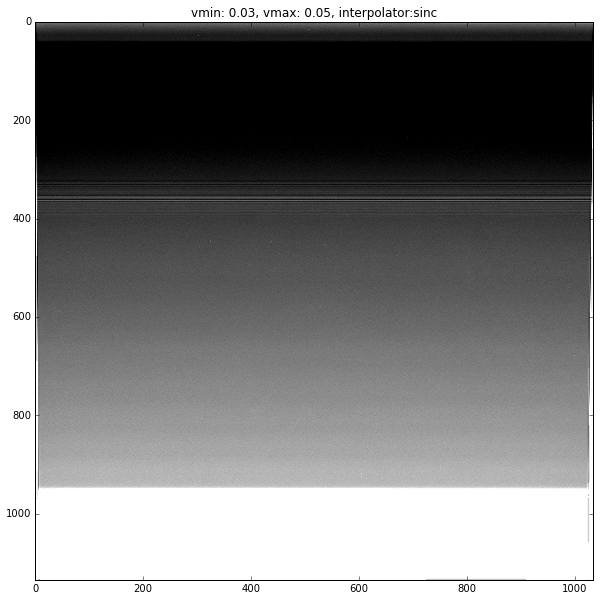

In [16]:
plotting.myinteract(data)

In [17]:
subtracted = data - mean_value[:, np.newaxis]

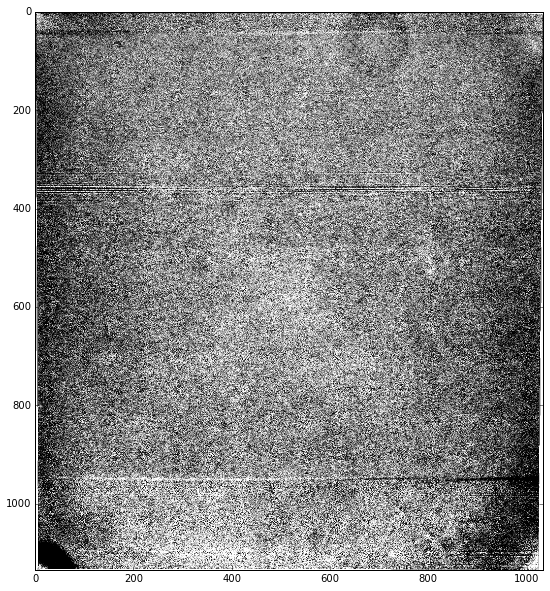

In [27]:
low, high = np.percentile(subtracted, (10,90))
plt.imshow(subtracted, vmin=low, vmax=high)

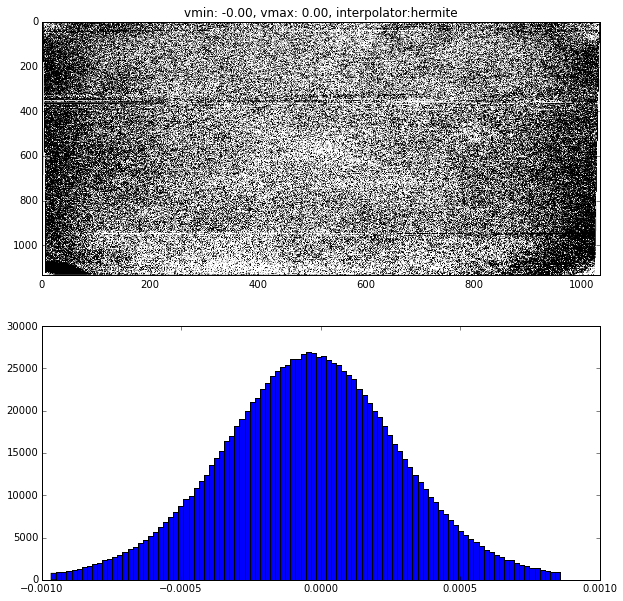

In [24]:
plotting.myinteract(subtracted)

In [42]:
cd ~/data/ciss/PDSdata-2015-02-20T14-24-33-08-00/

/Users/klay6683/data/ciss/PDSdata-2015-02-20T14-24-33-08-00


In [43]:
ls

N1512191062_1.IMG*                      N1595336241_1_CALIB.LBL*
N1512191062_1.LBL*                      N1595336241_1_thumb.jpg*
N1512191062_1_CALIB.IMG*                N1595944266_1.IMG*
N1512191062_1_CALIB.LBL*                N1595944266_1.LBL*
N1512191062_1_thumb.jpg*                N1595944266_1_CALIB.IMG*
N1563636983_1.IMG*                      N1595944266_1_CALIB.LBL*
N1563636983_1.LBL*                      N1595944266_1_thumb.jpg*
N1563636983_1_CALIB.IMG*                N1595944336_1.IMG*
N1563636983_1_CALIB.LBL*                N1595944336_1.LBL*
N1563636983_1_thumb.jpg*                N1595944336_1_CALIB.IMG*
N1595328621_1.IMG*                      N1595944336_1_CALIB.LBL*
N1595328621_1.LBL*                      N1595944336_1_thumb.jpg*
N1595328621_1_CALIB.IMG*                N1595944414_1.IMG*
N1595328621_1_CALIB.LBL*                N1595944414_1.LBL*
N1595328621_1_thumb.jpg*                N1595944414_1_CALIB.IMG*
N1595328693_1.IMG*                      N1595944414_1_CALIB.L

In [45]:
fnames = !ls *.LBL

In [47]:
fnames = [i for i in fnames if not 'CALIB' in i]

In [48]:
from pyciss.pipeline import pipeline

In [64]:
from IPython.parallel import Client
c = Client()

In [65]:
dview = c[:]
lview = c.load_balanced_view()

In [66]:
%%px
from pyciss.pipeline import pipeline

[stderr:0] :0: FutureWarning: IPython widgets are experimental and may change in the future.
[stderr:1] :0: FutureWarning: IPython widgets are experimental and may change in the future.
[stderr:2] :0: FutureWarning: IPython widgets are experimental and may change in the future.
[stderr:3] :0: FutureWarning: IPython widgets are experimental and may change in the future.


In [67]:
results = lview.map_async(pipeline, fnames)

In [68]:
results.get()

['Problem with N1512191062_1.LBL',
 'Problem with N1563636983_1.LBL',
 'Problem with N1595328621_1.LBL',
 'Problem with N1595328693_1.LBL',
 'Problem with N1595328765_1.LBL',
 'Problem with N1595328837_1.LBL',
 'Problem with N1595328909_1.LBL',
 'Problem with N1595328981_1.LBL',
 'Problem with N1595329053_1.LBL',
 'Problem with N1595329125_1.LBL',
 'Problem with N1595329197_1.LBL',
 'Problem with N1595336241_1.LBL',
 'Problem with N1595944266_1.LBL',
 'Problem with N1595944336_1.LBL',
 'Problem with N1595944414_1.LBL',
 'Problem with N1595944484_1.LBL',
 'Problem with N1595944554_1.LBL',
 'Problem with W1512190938_1.LBL',
 'Problem with W1563857545_1.LBL',
 'Problem with W1563857873_1.LBL',
 'Problem with W1563858060_1.LBL',
 'Problem with W1683902515_1.LBL']

In [69]:
from pyciss import pipeline

In [70]:
for fname in fnames:
    try:
        pipeline.calibrate_ciss(fname)
    except:
        print "Problem with {}".format(fname)
        pass